In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 导入jieba分词包
import jieba

In [20]:
# 调用jieba分词里面的 analyse 方法
from jieba import analyse

In [122]:
import jieba.posseg as psg

In [3]:
#导入词云包
import wordcloud

In [168]:
temp = pd.read_excel('线上面试数据标注2.0.xlsx',sheet_name='面试问题4',header=1)

In [169]:
statements = temp['回答内容']

In [170]:
statements = statements[:20]

In [171]:
statements

0     我认为，销售岗位的加班在某些情况下是必要的。嗯，因为很多时候。业绩就在那个特定的时间段出现的...
1     我觉得，销售岗位的加班和九九六，嗯，更多的是，就是对客户的一个负责吧，因为因为有的时候，可能...
2     好的销售岗的加班是由于可能是有由于记得某些原因，自己的业绩没有达到那个所要求的加班是可以理解...
3     嗯，我觉得销售岗位的加班感呃是比较正常的，因为销售岗位嘛，不像其他的岗位，就是时间什么的都比...
4     销售岗位的加班，其实在我之前上一段事情经历的时候，他就是相当于一个金融销售岗，嗯，本人在刚开...
5     销售是一个考验人的综合能力的岗位，他需要人很强的沟通表达能力，组织协调能力，人机交往能力随机...
6     加班啊，我觉得销售岗位的加班应该是挺正常的，不过我认为我应该不太能接受，因为每天都加的话，那...
7     嗯，嗯，对于加班这件事情呢，就是说，不仅是销售岗位，呃，我觉得就是加班肯定是不是特别的喜欢吧...
8     嗯，销售岗位的话，不同于其他这个职能岗位。呃不是说你在那个工作岗位上面把自己每天的一些任务。...
9     九九六是啥？我认为销售岗位就是嗯。嗯，就是类似于嗯。就是比较比较在意一些口才上的技能和与人沟...
10    我怎么看待销售岗位的加班或者九九六首先在社会上广大的这些行业里面销售行业应该是当今，社会支撑...
11    销售岗位，其实我个人来说是做的比较多的，因为我实习这一年做的也都是销售的行业销售这个行业呢，...
12    嗯。销售岗位的加班的话，你要看是什么情况吧？如果是特别要紧的，或者是比较嗯，比较重要的，你加...
13    嗯。销售岗位的加班应该是很正常的吧，九九六也没关系，嗯，因为工作的话，他就是工作嘛。加班也没关系。
14    嗯。呃，我觉得销售岗位的加班呃一方面呢，我觉得可能是工作内容本身就是这个工作岗位，它需要去加...
15    销售岗位的加班，其实可能更多的是基于自愿的吧，或者是做一些研究性的工作，因为像息方面，我感觉...
16    嗯。嗯，我觉得，销售岗位的加班是还是比较比较正常的，因为销售它并不是一个在固定时间内做固定事...
17    嗯。对的这个问题，首先，他在全行业都是这样一个看法，你作为销售，你必须要加班，或者必

### 获取基于词频统计的文本有效词

In [123]:
def cp_keywords(statement):
    # 读取停用词表
    stop_words = pd.read_csv('stopword.txt','quoting=csv.QUOTE_NONE',engine='python',header=None).values
    # 新建一个空“”存放jieba分词后不在【停用词表】的有效词
    words=""
    # 对分词后的每个词进行遍历和筛选
    for word in jieba.lcut(statement):
        #判断每个词是否在停用词表里，
        if word not in stop_words:
            # 将不在停用词表里的词 依次存放于“words”
            words += word +" "
    # 新建一个空[]
    new_words = []
    # 遍历words里的每个词及其词性,得到一个pair类型
    for wg in psg.cut(words):
        #将pair类型转换成元组类型，得到（词，词性），主要用于根据索引取值
        wg = tuple(wg)
        #获取 词
        word = wg[0]
        # 获取 词对应的词性
        flag = wg[1]
        # 判断 words里面的每个词对应的词性是否在以下词性里
        if flag in  ['ns', 'n', 'vn', 'v','nr','a','i']:
            # 将属于这些词性的有效词存放于new_words
            new_words.append(word)
    #对new_words里面的词进行降序词频统计，得到排名靠前的20个词，并换成Series类型
    importance_words = Series(new_words).value_counts()[:20]
    # 返回 Seires类型的前20个词频
    return importance_words

### 获取基于TextRank的文本有效词

In [124]:
def tr_keywords(statement):
    # 读取停用词表
    stop_words = pd.read_csv('stopword.txt','quoting=csv.QUOTE_NONE',engine='python',header=None).values
    # 新建一个空“”(存放去除停用词后的词)
    words = ""
    # 对分词后的每个词进行遍历和筛选
    for word in jieba.lcut(statement):
        #判断每个词是否在停用词表里
        if word not in stop_words:
            # 将不在停用词表里的词 依次存储于“words”
            words += word +" "
    # 定义一个变量TextRank
    TextRank = analyse.extract_tags# analyse.extract_tags 是jieba里面基于TextRank封装的一个函数
    #TextRank参数如下
    #words：原始文本（这里是我们去除停用词后的词）
    #allowPOS：需要保留下的词性
    # withWeight：是否显示权重大小
    #topK：根据权重大小取排名前多少的关键词(这里默认选择topK=20
    keywords = TextRank(words,allowPOS=('ns', 'n', 'vn', 'v','nr','a','i'),withWeight=True)
    # 新建一个空字典 用来存储 Keywords里的每个词及其权重大小
    kw_dict={}
    # 遍历keywords
    for kw in keywords:
        # 获取 词
        word = kw[0]
        # 获取 词的权重
        weight=kw[1]
        # 根据字典每个键 获取其对应的值 
        kw_dict[word]=weight
    # 将字典转换成Series类型
    importance_words = Series(kw_dict)
    # 返回Seires类型的Top20
    return importance_words

In [125]:
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei']

### 效果对比

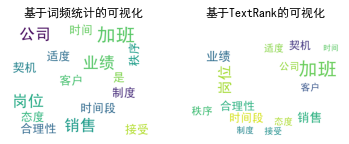

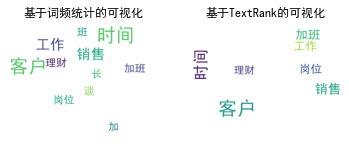

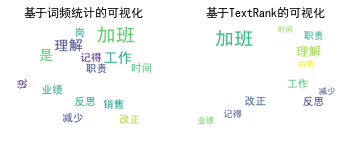

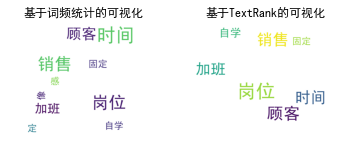

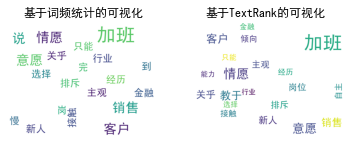

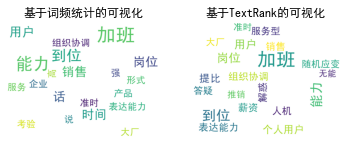

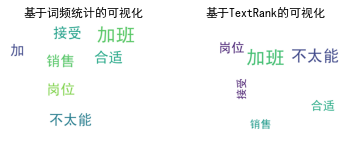

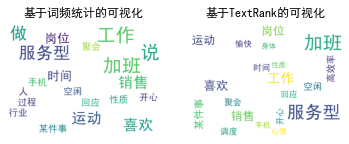

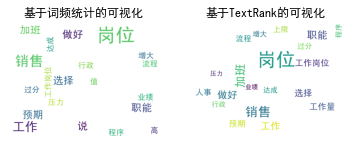

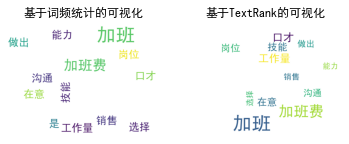

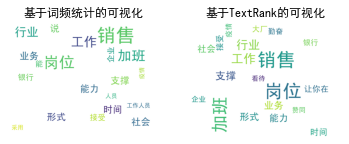

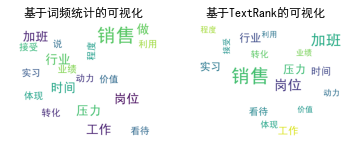

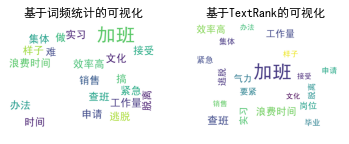

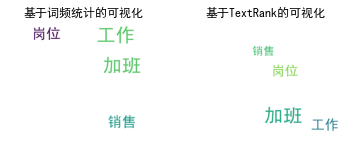

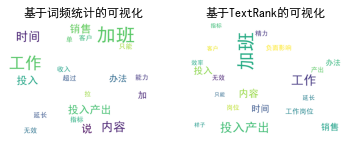

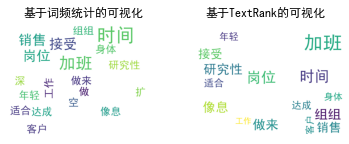

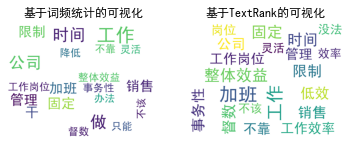

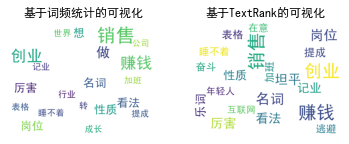

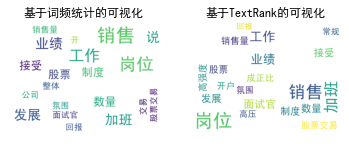

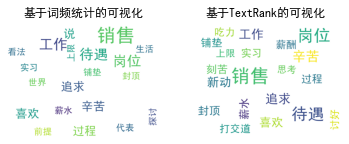

In [172]:
# 遍历20条文本数据
for idx,statement in statements.items():、
    # 获取基于词频统计的有效词
    cp_importance_words=cp_keywords(statement)
    # 获取基于TextRank的有效词
    tr_importance_words=tr_keywords(statement)
    # 词云代码如下：
    wc = wordcloud.WordCloud(font_path='./simhei.ttf', #设置字体
                             background_color='white',   # 背景颜色
                             max_words = None, #词语显示的最大词数
                             max_font_size=200, # 字体最大值
                             min_font_size=5,  # 字体最小值
                             random_state=42,  #随机数
    #                          mask=aimask,  #造型遮盖
    #                          color_func=genclr,
                             width=1600,height=1200,margin=2)
    # 一个尺寸为（6，5）的画板
    plt.figure(figsize=(6,5))
    ax1=plt.subplot(1,2,1)
    # 第一条文本的基于词频统计的词云展示
    wc.generate_from_frequencies(cp_importance_words)
    ax1.imshow(wc)
    ax1.set_title('基于词频统计的可视化')
    #关闭坐标轴
    ax1.axis('off')
    ax2=plt.subplot(1,2,2)
    #第一条文本的基于TextRank的词云展示
    wc.generate_from_frequencies(tr_importance_words)
    ax2.imshow(wc)
    ax2.set_title('基于TextRank的可视化')
    #关闭坐标轴
    ax2.axis('off')